# **Urutan Dalam Machine Learning**

In [1]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("titanic")

# Menampilkan Data Awal 5 baris
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
## Exploratory Data Analysis (EDA)

In [2]:
# Cek Data Kosong
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [3]:
# Cek Data Duplikasi
df.duplicated().sum()

np.int64(107)

In [4]:
# Cek Tipe Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


---
## Data Preprocessing

In [5]:
# Menghapus Columns Sex
df.drop(["sex", "alive"], axis=1, inplace=True)

In [6]:
# Menampilkan Data Awal 5 baris
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True


In [7]:
# Memisahkan Data Sesuai Tipe Data
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [8]:
# Mengisi Data Kosong
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

# Syarat: Tipe Data Harus Int atau Float
iter = IterativeImputer()
# Syarat: Dalam Bentuk Str Maka Menggunakan 'most_frequent'
simp = SimpleImputer(strategy='most_frequent')

df[numerical_cols] = iter.fit_transform(df[numerical_cols])
df[categorical_cols] = simp.fit_transform(df[categorical_cols])

In [9]:
# Menggunakan OneHotEncoder Karena Mengubah setiap kategori menjadi kolom biner (0 atau 1).
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
columns = ['embarked', 'who', 'adult_male', 'deck', 'embark_town', 'alone']
encoded_frames = [df.drop(columns, axis=1)]

for column in columns:
    value = ohe.fit_transform(df[[column]])
    ohe_columns = list(ohe.categories_)
    data = pd.DataFrame(value.toarray(), columns = ohe_columns[0])
    encoded_frames.append(data)

df = pd.concat(encoded_frames, axis=1)
df.head()

,survived,pclass,age,sibsp,parch,fare,class,C,Q,S,...,C,D,E,F,G,Cherbourg,Queenstown,Southampton,False,True
0,0.0,3.0,22.0,1.0,0.0,7.2500,Third,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,First,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,Third,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,First,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,Third,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [10]:
# Menggunakan OrdinalEncoder Karena Mengubah kategori menjadi angka berdasarkan urutan yang bermakna.
from sklearn.preprocessing import OrdinalEncoder

ord = OrdinalEncoder()
df['class'] = ord.fit_transform(df[['class']])
df.head()

,survived,pclass,age,sibsp,parch,fare,class,C,Q,S,...,C,D,E,F,G,Cherbourg,Queenstown,Southampton,False,True
0,0.0,3.0,22.0,1.0,0.0,7.2500,2.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,2.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,2.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


---
## Melihat Hubungan Antar Data

In [11]:
df.columns

Index([   'survived',      'pclass',         'age',       'sibsp',
             'parch',        'fare',       'class',           'C',
                 'Q',           'S',       'child',         'man',
             'woman',         False,          True,           'A',
                 'B',           'C',           'D',           'E',
                 'F',           'G',   'Cherbourg',  'Queenstown',
       'Southampton',         False,          True],
      dtype='object')

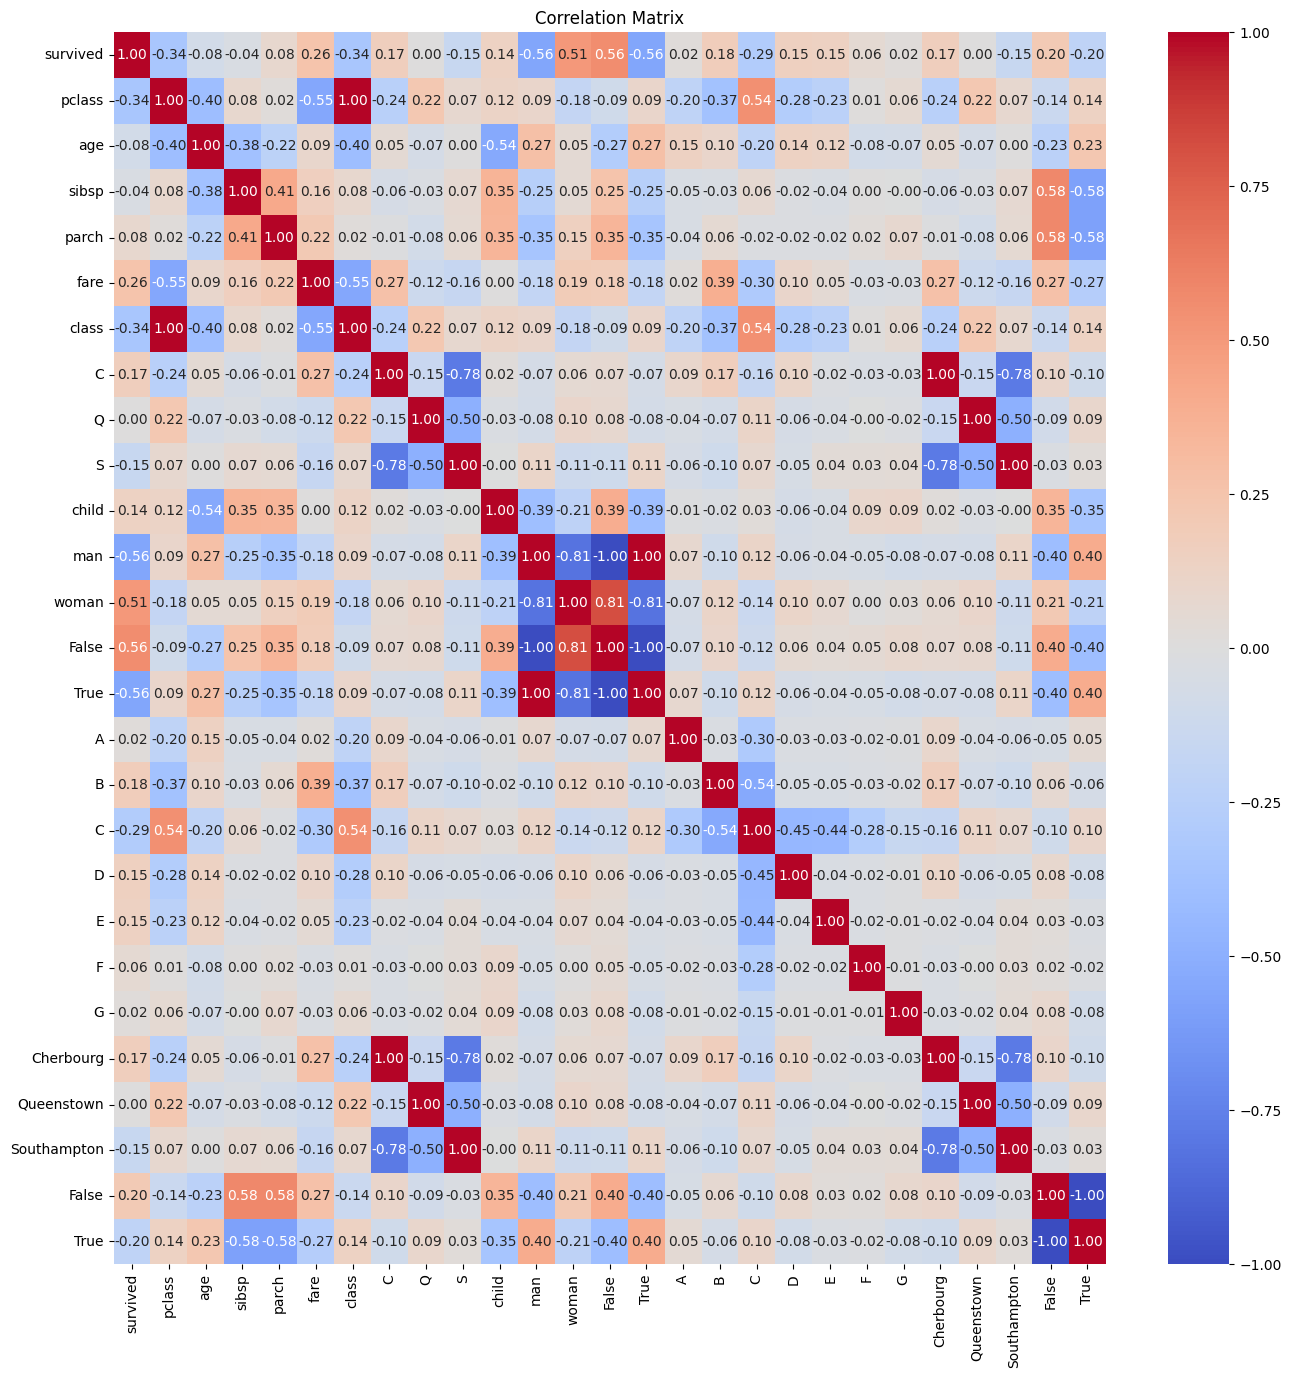

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr(numeric_only=True)  # pastikan hanya numerik
plt.figure(figsize=(16, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [13]:
df.corr(numeric_only=True)['survived'].sort_values(ascending=False)

,survived
survived,1.000000
False,0.557080
woman,0.506562
fare,0.257307
False,0.203367
B,0.175095
Cherbourg,0.168240
C,0.168240
D,0.150716
E,0.145321


---
## Mengubah Column Menjadi Tipe Data Str

In [14]:
df.columns = df.columns.astype(str)

---
## Train Test Split Data Dengan X Dan y

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(["survived"], axis=1)
y = df["survived"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
## Pemilihan Model Beserta Mengevaluasinya

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

model1 = RandomForestClassifier(max_depth=5, random_state=42)
model2 = DecisionTreeClassifier(max_depth=5, min_samples_split=10)

- RandomForestClassifier()

In [17]:
from sklearn.metrics import accuracy_score

# Model1 fit
model1.fit(X_train, y_train)

# Prediksi di data latih dan uji
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

# Hitung akurasi
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Akurasi Data Latih:", train_acc)
print("Akurasi Data Uji  :", test_acc)

Akurasi Data Latih: 0.8651685393258427
Akurasi Data Uji  : 0.8212290502793296


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, X, y, cv=5)
print("Cross-val accuracy:", scores.mean())

Cross-val accuracy: 0.8327788588286988


- DecisionTreeClassifier()

In [19]:
from sklearn.metrics import accuracy_score

# Model2 fit
model2.fit(X_train, y_train)

# Prediksi di data latih dan uji
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

# Hitung akurasi
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Akurasi Data Latih:", train_acc)
print("Akurasi Data Uji  :", test_acc)

Akurasi Data Latih: 0.8693820224719101
Akurasi Data Uji  : 0.8770949720670391


In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, X, y, cv=5)
print("Cross-val accuracy:", scores.mean())

Cross-val accuracy: 0.8271985437197916
